In [1]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras import layers
from keras import models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import img_to_array, array_to_img
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten


(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Звичайна нейронна мережа

In [10]:
train_images0 = train_images / 255.0
test_images0 = test_images / 255.0


model0 = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model0.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

result0 = model0.fit(train_images0, train_labels, epochs=5, validation_split=0.2)       

Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5236 - accuracy: 0.8138 - val_loss: 0.4266 - val_accuracy: 0.8497
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3854 - accuracy: 0.8611 - val_loss: 0.3672 - val_accuracy: 0.8723
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3517 - accuracy: 0.8725 - val_loss: 0.3750 - val_accuracy: 0.8664
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3307 - accuracy: 0.8804 - val_loss: 0.3399 - val_accuracy: 0.8806
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3152 - accuracy: 0.8874 - val_loss: 0.3507 - val_accuracy: 0.8801


In [9]:
test_loss, test_acc = model0.evaluate(test_images0, test_labels)  

313/313 [==============================] - 1s 2ms/step - loss: 0.3643 - accuracy: 0.8755


Згорткова нейронна мережа

In [4]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [11]:
train_images1 = train_images.reshape((60000, 28, 28, 1))
train_images1 = train_images.astype("float32") / 255
test_images1 = test_images.reshape((10000, 28, 28, 1))
test_images1 = test_images.astype("float32") / 255

In [12]:
model1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),

    layers.Dense(10, activation="softmax")
])

model1.summary()

model1.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 576)              

In [13]:
result1 = model1.fit(train_images1, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 25s 33ms/step - loss: 0.6026 - accuracy: 0.7776 - val_loss: 0.3980 - val_accuracy: 0.8546
Epoch 2/5
750/750 [==============================] - 20s 27ms/step - loss: 0.3636 - accuracy: 0.8667 - val_loss: 0.3233 - val_accuracy: 0.8832
Epoch 3/5
750/750 [==============================] - 18s 25ms/step - loss: 0.3029 - accuracy: 0.8900 - val_loss: 0.2904 - val_accuracy: 0.8957
Epoch 4/5
750/750 [==============================] - 17s 23ms/step - loss: 0.2673 - accuracy: 0.9016 - val_loss: 0.3141 - val_accuracy: 0.8817
Epoch 5/5
750/750 [==============================] - 19s 25ms/step - loss: 0.2419 - accuracy: 0.9105 - val_loss: 0.2735 - val_accuracy: 0.9017


In [14]:
test_loss, test_acc = model1.evaluate(test_images1, test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.2782 - accuracy: 0.8987


In [15]:
print(result1.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


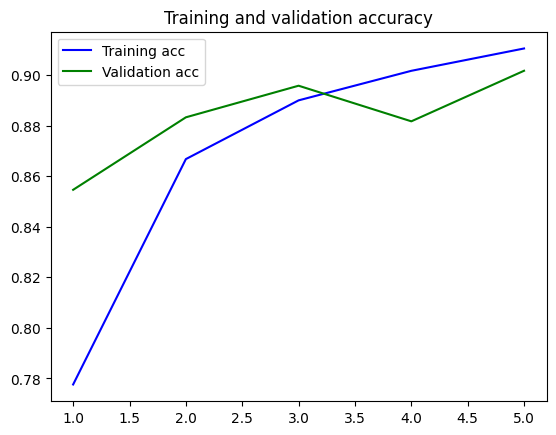

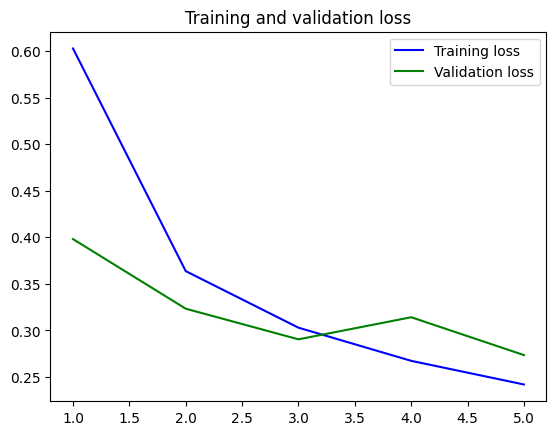

In [16]:
acc = result1.history["accuracy"]
val_acc = result1.history["val_accuracy"]

loss = result1.history["loss"]
val_loss = result1.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "b", label="Training acc")
plt.plot(epochs, val_acc, "g", label="Validation acc")

plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "b", label="Training loss")
plt.plot(epochs, val_loss, "g", label="Validation loss")
plt.title("Training and validation loss")

plt.legend()
plt.show()

Навчання з використанням передвиборної мережі

Виділення ознак

In [2]:
train_images2 = train_images.reshape((60000, 784))
test_images2 = test_images.reshape((10000, 784))

train_images2=np.dstack([train_images2]*3)
test_images2=np.dstack([test_images2]*3)

train_images2 = train_images2.reshape(-1, 28,28,3)
test_images2= test_images2.reshape (-1,28,28,3)

train_images2 = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in train_images2])
test_images2 = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in test_images2])


train_images2 = train_images2.astype('float32') / 255
test_images2 = test_images2.astype('float32') / 255


train_images2.shape, test_images2.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

In [5]:
conv_base2 = VGG16(weights="imagenet", include_top=False, input_shape=(48, 48, 3))
conv_base2.trainable = False

model2 = models.Sequential([
   conv_base2,
   layers.Flatten(),
   layers.Dense(64, activation="relu"),
   layers.Dense(10, activation="softmax"),
])

model2.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

result2 = model2.fit(
    train_images2,
    train_labels,
    epochs=5,
    validation_steps=5,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/5
750/750 [==============================] - 243s 323ms/step - loss: 0.5729 - accuracy: 0.8058 - val_loss: 0.4534 - val_accuracy: 0.8375
Epoch 2/5
750/750 [==============================] - 280s 373ms/step - loss: 0.4117 - accuracy: 0.8503 - val_loss: 0.4141 - val_accuracy: 0.8281
Epoch 3/5
750/750 [==============================] - 276s 368ms/step - loss: 0.3793 - accuracy: 0.8635 - val_loss: 0.3801 - val_accuracy: 0.8344
Epoch 4/5
750/750 [==============================] - 295s 394ms/step - loss: 0.3615 - accuracy: 0.8691 - val_loss: 0.4004 - val_accuracy: 0.8500
Epoch 5/5
750/750 [==============================] - 315s 420ms/step - loss: 0.3467 - accuracy: 0.8736 - val_loss: 0.3956 - val_accuracy: 0.8406


In [6]:
test_loss, test_acc = model2.evaluate(test_images2, test_labels)

313/313 [==============================] - 52s 166ms/step - loss: 0.3827 - accuracy: 0.8628


In [7]:
print(result2.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


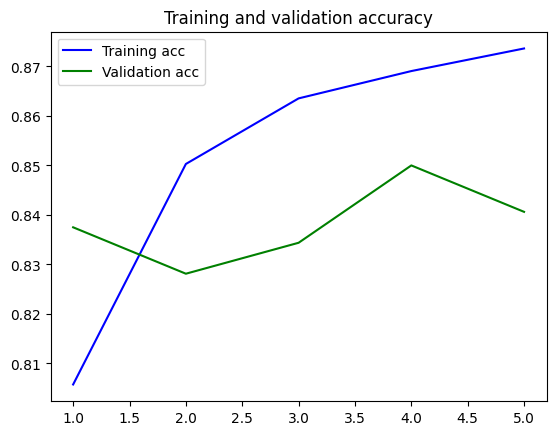

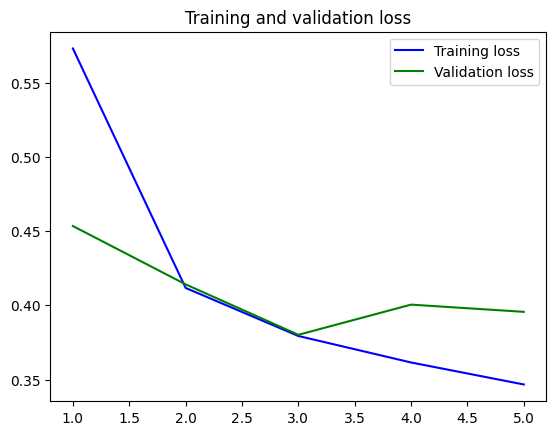

In [8]:
acc = result2.history["accuracy"]
val_acc = result2.history["val_accuracy"]

loss = result2.history["loss"]
val_loss = result2.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "b", label="Training acc")
plt.plot(epochs, val_acc, "g", label="Validation acc")

plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "b", label="Training loss")
plt.plot(epochs, val_loss, "g", label="Validation loss")
plt.title("Training and validation loss")

plt.legend()
plt.show()

Донавчання

In [9]:
conv_base3 = VGG16(weights="imagenet", include_top=False, input_shape=(48, 48, 3))
conv_base3.trainable = False

conv_base3.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [10]:
for layer in conv_base3.layers:
    if layer.name == "block5_conv1":
        layer.trainable = True
    else:
        layer.trainable = False


model3 = models.Sequential([
   conv_base3,
   layers.Flatten(),
   layers.Dense(64, activation="relu"),
   layers.Dense(10, activation="softmax"),
])

model3.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

result3 = model3.fit(
    train_images2,
    train_labels,
    epochs=5,
    validation_steps=5,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/5
750/750 [==============================] - 261s 348ms/step - loss: 0.5942 - accuracy: 0.8005 - val_loss: 0.4018 - val_accuracy: 0.8500
Epoch 2/5
750/750 [==============================] - 340s 454ms/step - loss: 0.4121 - accuracy: 0.8511 - val_loss: 0.4307 - val_accuracy: 0.8313
Epoch 3/5
750/750 [==============================] - 342s 456ms/step - loss: 0.3806 - accuracy: 0.8614 - val_loss: 0.3935 - val_accuracy: 0.8375
Epoch 4/5
750/750 [==============================] - 322s 430ms/step - loss: 0.3605 - accuracy: 0.8700 - val_loss: 0.3665 - val_accuracy: 0.8531
Epoch 5/5
750/750 [==============================] - 332s 443ms/step - loss: 0.3462 - accuracy: 0.8741 - val_loss: 0.3626 - val_accuracy: 0.8594


In [11]:
test_loss, test_acc = model3.evaluate(test_images2, test_labels)

313/313 [==============================] - 76s 244ms/step - loss: 0.3773 - accuracy: 0.8664


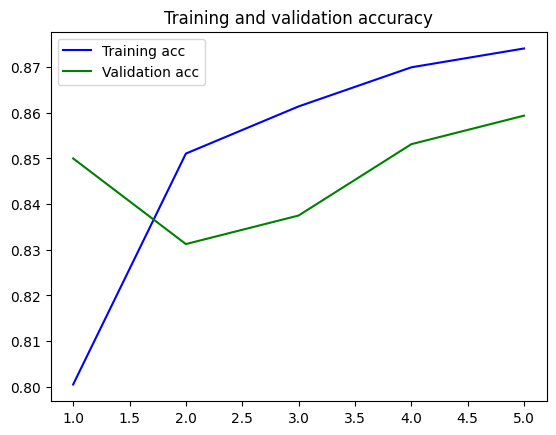

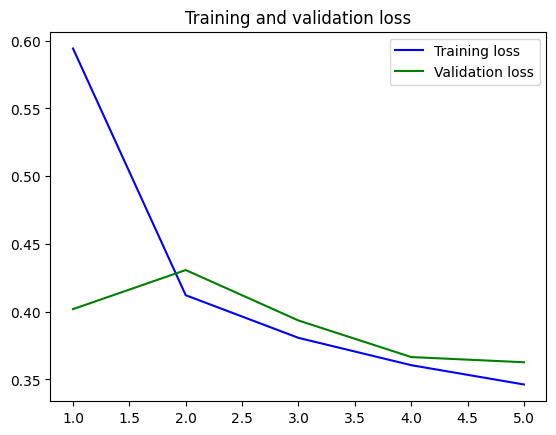

In [12]:
import matplotlib.pyplot as plt


acc = result3.history["accuracy"]
val_acc = result3.history["val_accuracy"]

loss = result3.history["loss"]
val_loss = result3.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "b", label="Training acc")
plt.plot(epochs, val_acc, "g", label="Validation acc")

plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "b", label="Training loss")
plt.plot(epochs, val_loss, "g", label="Validation loss")
plt.title("Training and validation loss")

plt.legend()
plt.show()